In [10]:
from qiskit import *

In [11]:
sirket = QuantumCircuit(3, 3)  # quantum circuit containing 3 qubits and 3 classical bits

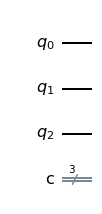

In [12]:
sirket.draw()

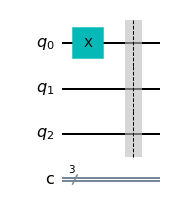

In [13]:
# we will teleport the state of q0 over to q2; q1 will be required in this process
sirket.x(0)
sirket.barrier() # draws a vertical line in the circuit drawing, just to make the circuit look good
sirket.draw()

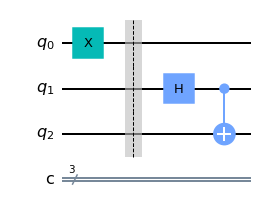

In [14]:
sirket.h(1)       # we want to
sirket.cx(1, 2)   # enatngle qubits 1 & 2
sirket.draw()

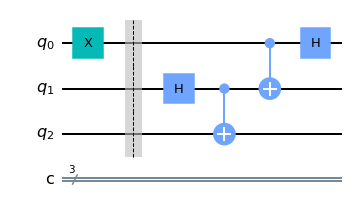

In [15]:
sirket.cx(0, 1)
sirket.h(0)
sirket.draw()

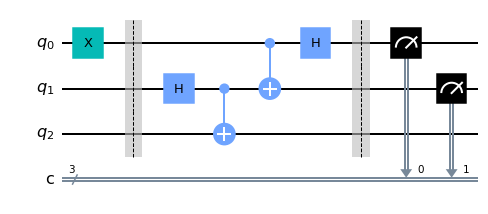

In [16]:
sirket.barrier()
sirket.measure([0,1], [0,1])
sirket.draw()

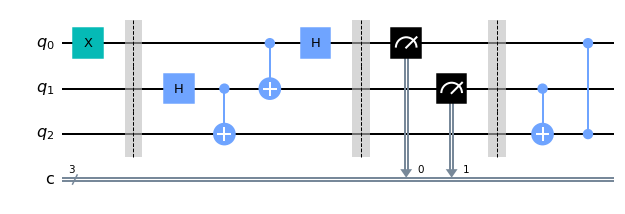

In [17]:
sirket.barrier()
sirket.cx(1, 2)
sirket.cz(0, 2)
sirket.draw()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


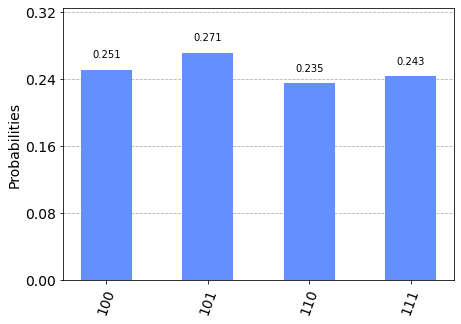

In [18]:
# the teleportation protocol is complete
# we now expect to see the state |1> in q2, which was earlier in q0

sirket.measure(2, 2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(sirket, backend=simulator, shots=2048).result()
counts = result.get_counts()

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [19]:
# notice that in all the outcomes, the bit c2 is always 1 i.e., 100, 101, 110, 111
print(counts)

{'111': 498, '100': 514, '101': 554, '110': 482}


In [ ]:
# summary: state of q0, after applying an X gate, was teleported to q2